In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sea

In [2]:
df = pd.read_csv("exams.csv")

In [3]:
df.shape

(1000, 8)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:>

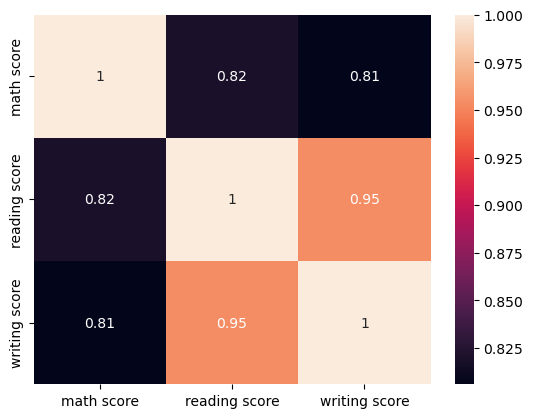

In [9]:
sea.heatmap(df.corr(), annot=True)

In [10]:
df_draft = df

In [11]:
df_draft["gender"] = df['gender'].replace(["female", "male"],[1, 2])

In [12]:
df_draft['race/ethnicity'] = df_draft['race/ethnicity'].replace(["group A", "group B", "group C", "group D", "group E"],[1, 2, 3, 4, 5])

In [14]:
df_draft["test preparation course"] = df["test preparation course"].replace(["completed", "none"],[1, 0])

In [16]:
df_draft["lunch"] = df['lunch'].replace(["standard", "free/reduced"],[0, 1])

In [18]:
df_draft["parental level of education"].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [19]:
df_draft["parental level of education"] = df["parental level of education"].replace(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],[1, 2, 3, 4, 5, 6])

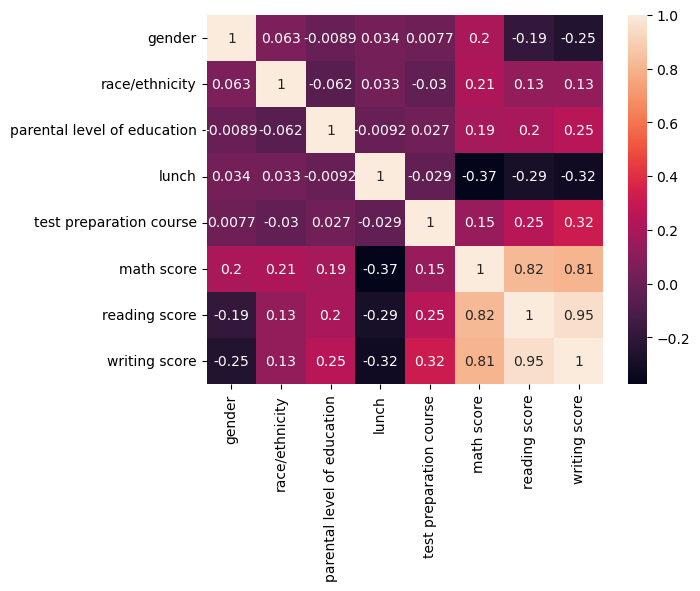

In [20]:
sea.heatmap(df_draft.corr(), annot=True)
plt.show()

In [21]:
df_draft = df_draft.assign(moy=(df_draft['math score']+df_draft['reading score']+df_draft['writing score'])/3)

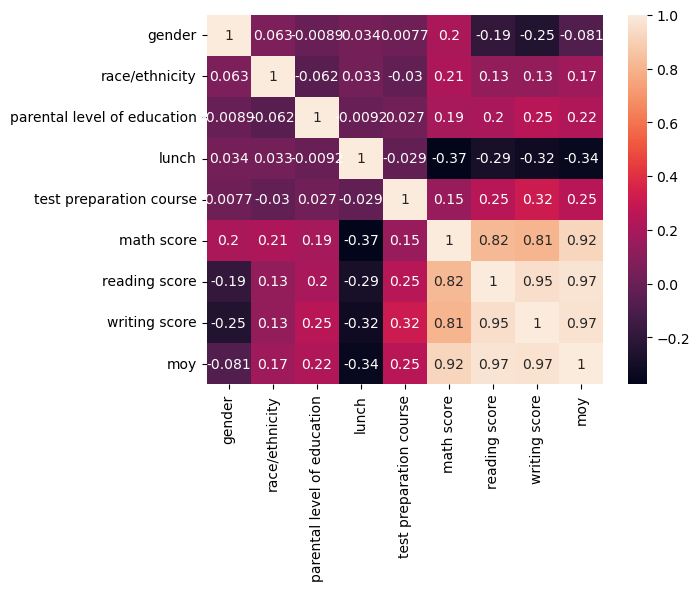

In [22]:
sea.heatmap(df_draft.corr(), annot=True)
plt.show()

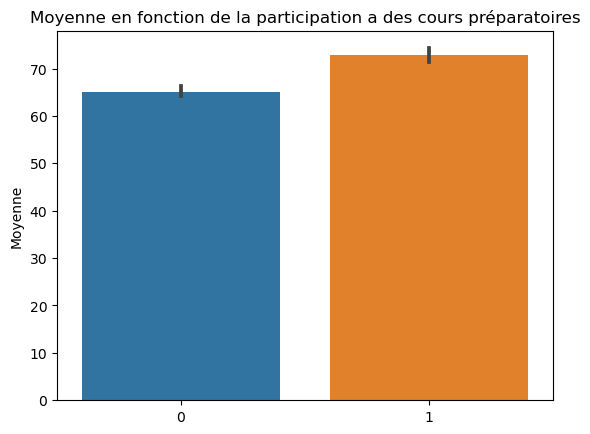

In [51]:
g = sea.barplot(data=df_draft, x="test preparation course", y="moy")
g.set_title("Moyenne en fonction de la participation a des cours préparatoires")
g.set(ylabel="Moyenne", xlabel="")     
plt.show()

LE FAIT DE SUIVRE DES COURS PREPARATOIR POUR L'EXAMEN A UN IMPACT SUR LA MOYENNE.

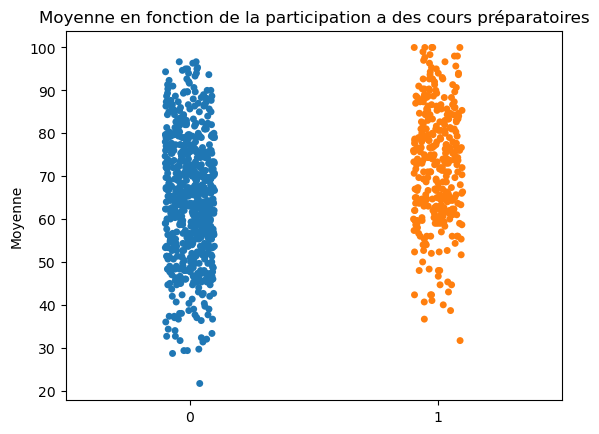

In [52]:
g = sea.stripplot(data=df_draft, x="test preparation course",y="moy")
g.set_title("Moyenne en fonction de la participation a des cours préparatoires")
g.set(ylabel="Moyenne", xlabel="")
plt.show()

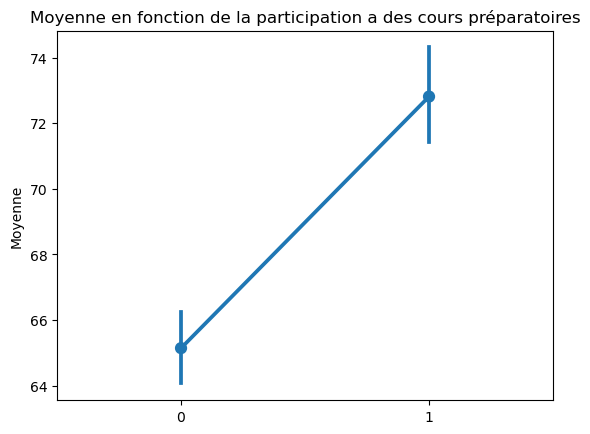

In [53]:
g = sea.pointplot(data=df_draft, x="test preparation course",y="moy")
g.set_title("Moyenne en fonction de la participation a des cours préparatoires")
g.set(ylabel="Moyenne", xlabel="")
plt.show()

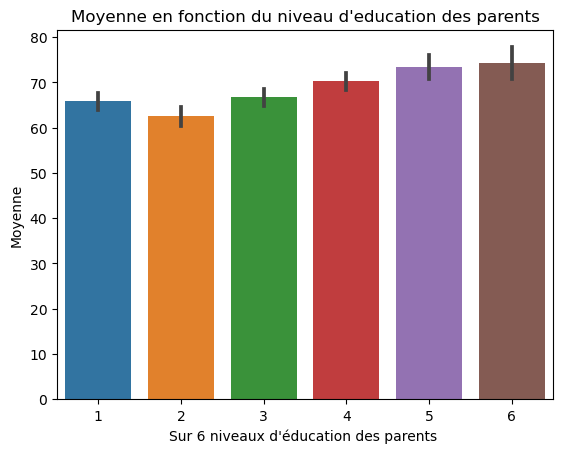

In [54]:
g = sea.barplot(data=df_draft, x="parental level of education", y="moy")
g.set_title("Moyenne en fonction du niveau d'education des parents")
g.set(ylabel="Moyenne", xlabel="Sur 6 niveaux d'éducation des parents ")
plt.show()

LE NIVEAU D'EDUCATION DES PARENTS A EGALEMENT UN IMPACT SUR LA MOYENNE.

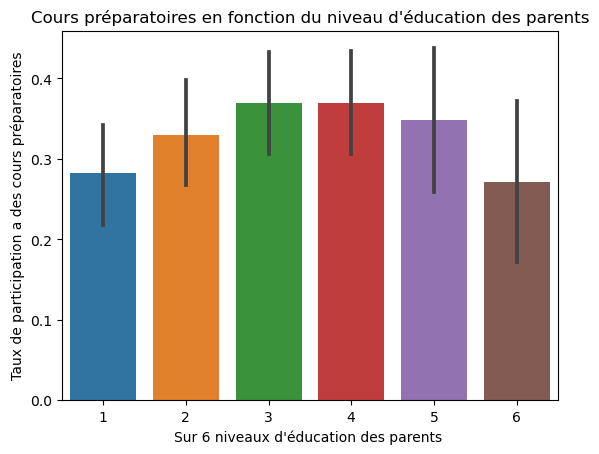

In [56]:
g = sea.barplot(data=df_draft, x="parental level of education", y="test preparation course")
g.set_title("Cours préparatoires en fonction du niveau d'éducation des parents")
g.set(ylabel="Taux de participation a des cours préparatoires", xlabel="Sur 6 niveaux d'éducation des parents ")
plt.show()

LE NIVEAU D'EDUCATION DES PARENTS A EGALEMENT UN IMPACT SUR LE TAUX DE PARTICIPATIONS A DES COURS PREPARATOIRES

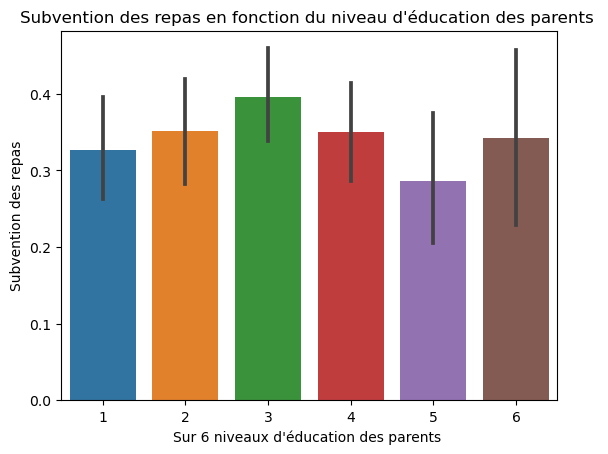

In [57]:
g = sea.barplot(data=df_draft, x="parental level of education", y="lunch")
g.set_title("Subvention des repas en fonction du niveau d'éducation des parents ")
g.set(ylabel="Subvention des repas", xlabel="Sur 6 niveaux d'éducation des parents ")
plt.show()

LE NIVEAU D'EDUCATION DES PARENTS SEMBRE ETRE UN FACTEURS DETERMINENT, sub

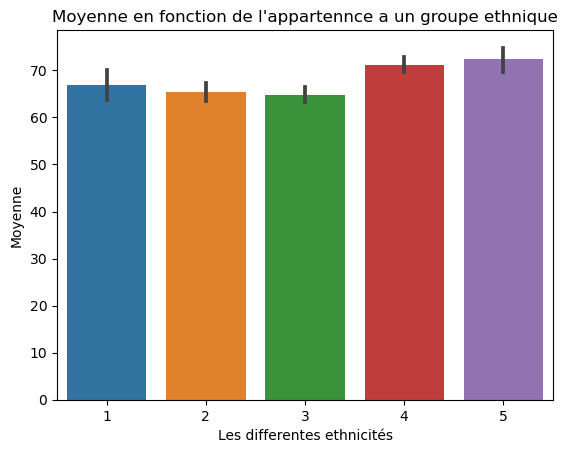

In [58]:
g = sea.barplot(data=df_draft, x="race/ethnicity", y="moy")
g.set_title("Moyenne en fonction de l'appartennce a un groupe ethnique")
g.set(ylabel="Moyenne", xlabel="Les differentes ethnicités")
plt.show()

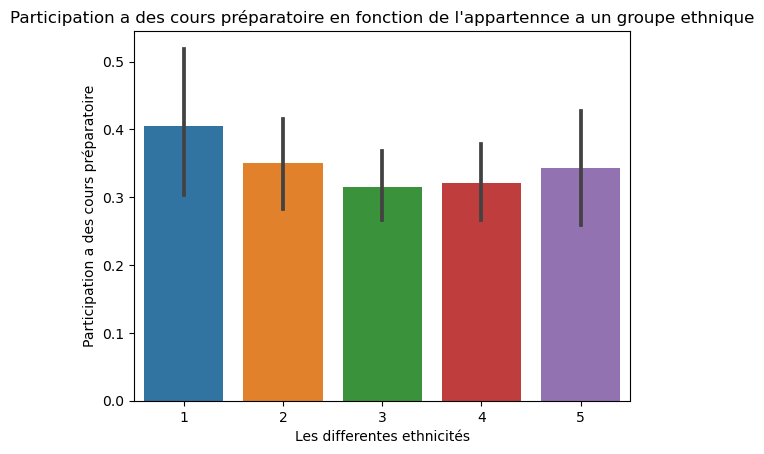

In [59]:
g = sea.barplot(data=df_draft, x="race/ethnicity", y="test preparation course")
g.set_title("Participation a des cours préparatoire en fonction de l'appartennce a un groupe ethnique")
g.set(ylabel="Participation a des cours préparatoire", xlabel="Les differentes ethnicités")
plt.show()

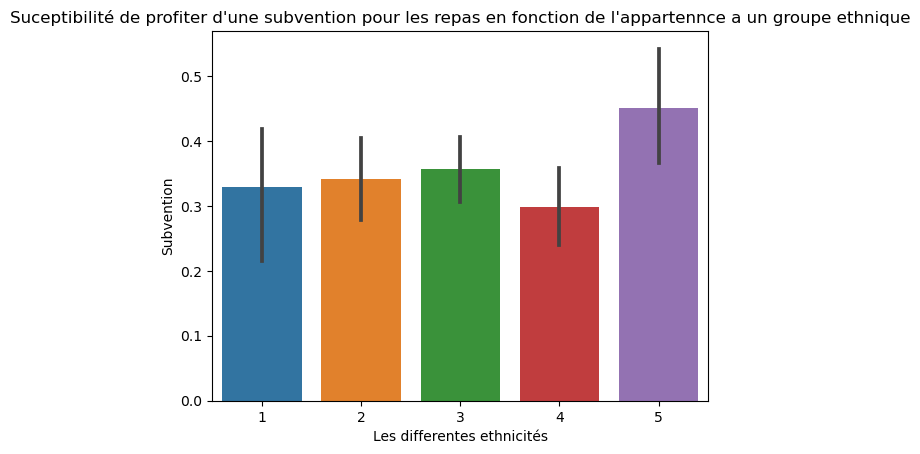

In [60]:
g = sea.barplot(data=df_draft, x="race/ethnicity", y="lunch")
g.set_title("Suceptibilité de profiter d'une subvention pour les repas en fonction de l'appartennce a un groupe ethnique")
g.set(ylabel="Subvention", xlabel="Les differentes ethnicités")
plt.show()

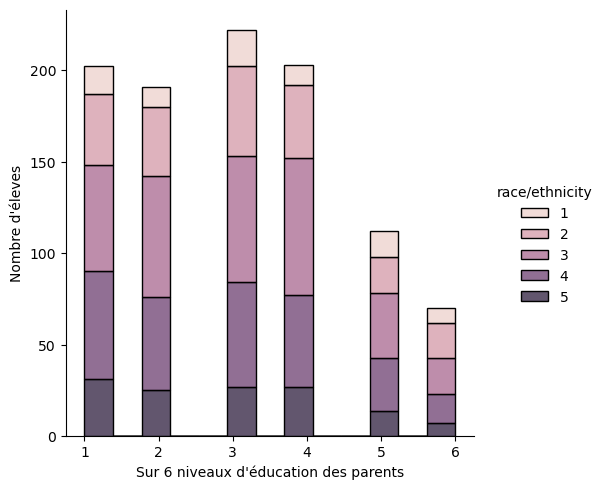

In [65]:
g = sea.displot(data=df_draft, x="parental level of education", hue="race/ethnicity", multiple="stack")
#g.set_title("Niveau de scolarité des parents avec leurs ethnicité eb sous groupe")
g.set(ylabel="Nombre d'éleves", xlabel="Sur 6 niveaux d'éducation des parents")
plt.show()

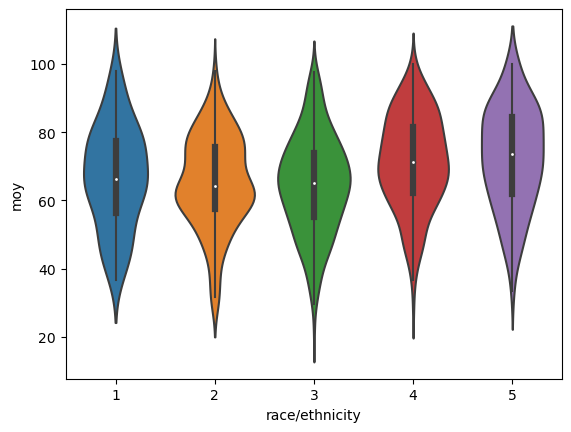

In [47]:
sea.violinplot(data=df_draft, x="race/ethnicity", y="moy", col="gender")
plt.show()